# Sentiment analysis with Logistic Regression

### Some plotting functions

In [16]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/logistic_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 14.08 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/logistic_regression/machine_learning_1/logistic_regression


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

In [3]:
import numpy as np
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

NameError: ignored

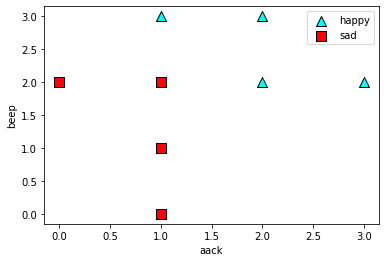

In [4]:
# Plotting the points
utils.plot_points(features, labels)

### Logistic regression

In [5]:
def sigmoid(x):
    ## TODO ##
    # implement sigmoid function
    output=1/(1+np.exp(-x))
    return output

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using sigmoid and score functions
    output=sigmoid(score(weights,bias,features))
    return output

def log_loss(weights, bias, features, label):
    ## TODO ##
    # implement log_loss calculation using prediction function
    pred=prediction(weights,bias,features)
    output= (-label*np.log(pred))-((1-label)*np.log(1-pred))
    return output

def total_log_loss(weights, bias, X, y):
    total_error = 0
    for i in range(len(X)):
        total_error += log_loss(weights, bias, X[i], y[i])
    return total_error

In [10]:
def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample
    pred=prediction(weights,bias,features)
    for i in range(len(weights)):
      weights[i] += learning_rate * (label-pred)*features[i]
      bias+=learning_rate *(label-pred)

    return weights, bias

In [21]:
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 10000):
    utils.plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    utils.draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias

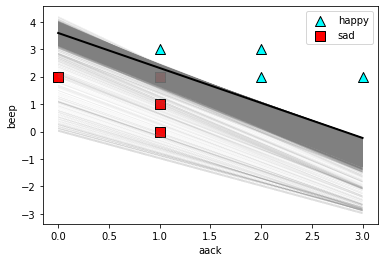

([2.586191875982141, 2.029664251136692], -7.285077868332696)

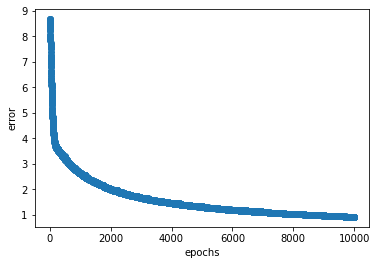

In [22]:
logistic_regression_algorithm(features, labels)

# Logistic SKlearn

In [25]:
from sklearn.linear_model import LogisticRegression
## TODO ##
# Use SKlearn to train logistic regression
clf = LogisticRegression(random_state=0).fit(features, labels)
clf.predict(features)

array([0, 0, 0, 0, 1, 1, 1, 1])

In [26]:
clf.score(features, labels)

1.0

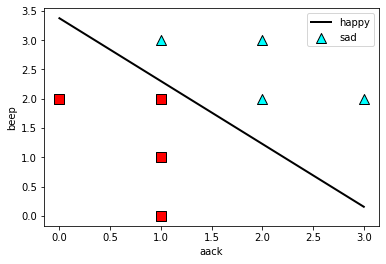

In [27]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()